# Following tutorial to generate spectrogram using Essentia

https://essentia.upf.edu/documentation/essentia_python_tutorial.html

In [81]:
# first, we need to import our essentia module. It is aptly named 'essentia'!
import essentia
import IPython
# as there are 2 operating modes in essentia which have the same algorithms,
# these latter are dispatched into 2 submodules:
import essentia.standard
import essentia.streaming
from essentia.standard import *
import random
import pandas as pd
import numpy as np

## Loading a file using Essentia MonoLoader

In [2]:
filename = '/media/romulo/6237-3231/urban_sound_challenge/audio/fold1/7061-6-0-0.wav'
#filename = '/home/romulo/Downloads/19rZ9NOH.wav'

In [3]:
desired_sample_rate = 44100
loader = essentia.standard.MonoLoader(filename = filename, sampleRate = desired_sample_rate)
audio = loader()

In [4]:
IPython.display.Audio(filename)

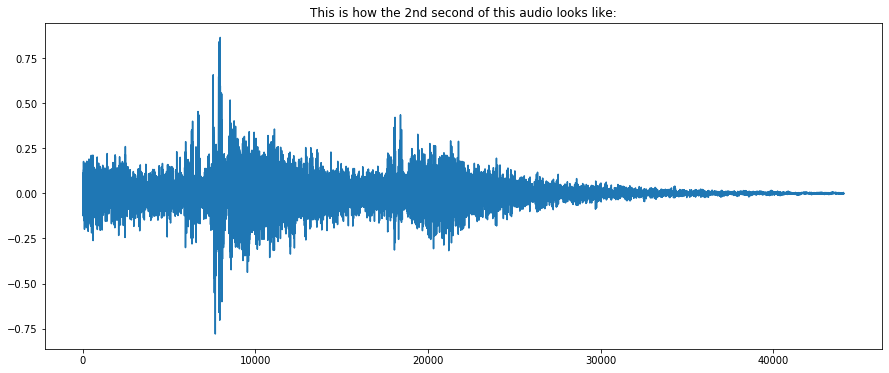

In [5]:
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6) # set plot sizes to something larger than default

plot(audio[1*desired_sample_rate:2*desired_sample_rate])
plt.title("This is how the 2nd second of this audio looks like:")
show() # unnecessary if you started "ipython --pylab"

# Mel Spectrogram using Essentia

In [6]:
w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
mfcc = MFCC()
logNorm = UnaryOperator(type='log')

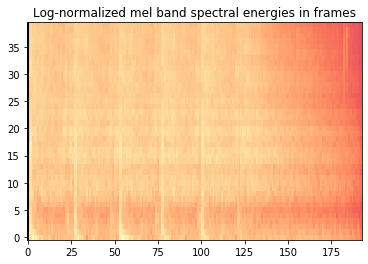

'\nimshow(mfccs[1:,:], aspect=\'auto\', origin=\'lower\', interpolation=\'none\', cmap=\'magma\')\nplt.title("MFCCs in frames")\nshow()\n'

In [7]:
mfccs = []
melbands = []
melbands_log = []

for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):
    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
    mfccs.append(mfcc_coeffs)
    melbands.append(mfcc_bands)
    melbands_log.append(logNorm(mfcc_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
mfccs = essentia.array(mfccs).T
melbands = essentia.array(melbands).T
melbands_log = essentia.array(melbands_log).T

# and plot
"""imshow(melbands[:,:], aspect = 'auto', origin='lower', interpolation='none', cmap='magma')
plt.title("Mel band spectral energies in frames")
show()
"""
imshow(melbands_log[:,:], aspect = 'auto', origin='lower', interpolation='none', cmap='magma')
plt.title("Log-normalized mel band spectral energies in frames")
show()
"""
imshow(mfccs[1:,:], aspect='auto', origin='lower', interpolation='none', cmap='magma')
plt.title("MFCCs in frames")
show()
"""

# Spectrogram from Librosa

In [8]:
import feature_extraction

In [9]:
details = feature_extraction.extract_log_mel_spectrogram(audio, sample_rate=desired_sample_rate,n_mels=128,n_fft=1024)

In [10]:
details.shape

(128, 194)

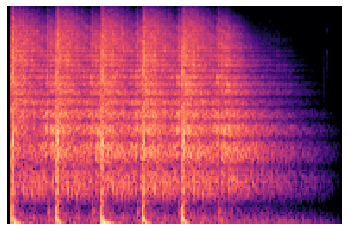

In [11]:
img=imshow(details[:,:], aspect = 'auto', origin='lower', interpolation='none', cmap='magma')
plt.axis('off')
show()

In [12]:
samples = feature_extraction.extract_frame_sequences_of_size_x(details, 128)

In [42]:
samples[50].shape

(128, 128)

In [29]:
len(samples)

66